# Apendice al seminario de computación científica

**Librerías para computación científica en Python**: En el apendice vamos a usar dos librerias extras, y no vamos a usar SciPy:

* **NumPy**: Es la librería base para trabajar con _arrays_ (similares a listas, matrices o conjuntos de matrices). Se encarga de todas las operaciones básicas (tanto matemáticas como lógicas), y las más comúnes del resto de operaciones como por ejemplo álgebra linear o transformadas de furier.
* **Matplotlib** (extra): Es una librería de visualización de datos, compatible con objetos de NumPy entre otros.
* **SymPy** (extra): Librería para hacer àlgebra computacional des de Python. Nosotros usaremos Maxima, que es un poco más completo y puramente de cálculo simbólico (mientras que SymPy contiene algoritmos de cálculo numérico también).

L'equip del projecte de nou mercat canvia, i també els seus plànols. El nou arquitecte del projecte però no ens ha pogut proporcionar el volum a l'interior de l'edifici, només la fórmula de la curva del sostre:

a)

$$
Z_1(x,y) = \cos^2(2 \pi y) (1-y^2) \textcolor{blue}{e^{-x^2}} + 1
$$

b)

$$
Z_2(x,y) = \cos^2(2 \pi y) (1-y^2) \textcolor{blue}{2e^{-\cosh(x)}} + 1
$$

en el sistema de referència que té com a origen el centre al terra del mercat, i les dimensions del mercat: 4 dm en l'eix x i 2 dm en l'eix y.

### Visualizació de la superfície

In [1]:
import numpy as np

def z1(x, y):
    return np.cos(y*2*np.pi)**2 * (1-y**2) * np.exp(-x**2) + 1

def z2(x, y):
    return np.cos(y*2*np.pi)**2 * (1-y**2) * 2*np.exp(-np.cosh(x)) + 1

In [2]:
x, y = np.linspace(-2, 2), np.linspace(-1, 1)

In [3]:
X, Y = np.meshgrid(x, y)
Z1 = z1(X, Y)
Z2 = z2(X, Y)

In [4]:
import matplotlib.pyplot as plt
#%matplotlib Qt

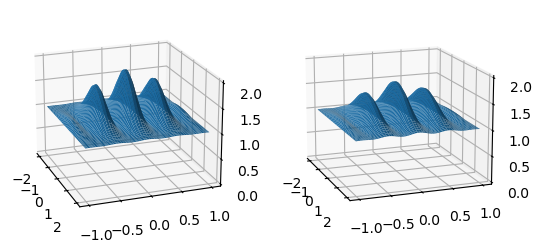

In [5]:
fig, axes = plt.subplots(1, 2, subplot_kw={"projection": "3d"})

ax = axes[0]
ax.view_init(elev=20, azim=-20)
ax.plot_surface(X, Y, Z1)
ax.set_zlim(bottom=0, top=2)

ax = axes[1]
ax.view_init(elev=15, azim=-20)
ax.plot_surface(X, Y, Z2)
ax.set_zlim(bottom=0, top=2);

### Càlcul del volum mitjançant computació simbòlica

In [6]:
from sympy import *
init_printing(use_unicode=False, wrap_line=False)

x = Symbol('x')
y = Symbol('y')

In [7]:
int_cupula_z1 = integrate(integrate(cos(y*2*pi)**2*(1-y**2)*exp(-x**2)+1, (y, -1, 1)), (x, -2, 2))
int_cupula_z1

In [8]:
volume_z1 = int_cupula_z1.evalf()
volume_z1

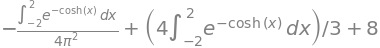

In [9]:
int_cupula_z2 = integrate(integrate(cos(y*2*pi)**2*(1-y**2)*2*exp(-cosh(x))+1, (y, -1, 1)), (x, -2, 2))
simplify(int_cupula_z2)

In [10]:
def int_1d(x):
    return np.exp(-np.cosh(x))

In [11]:
grid = np.linspace(-2, 2, 100)
midpoints = (grid[:-1] + grid[1:])/2
width = grid[1]-grid[0]

riemann_sum = np.sum(int_1d(midpoints))*width
volume_z2 = (-1/(4*np.pi**2) + 4/3) * riemann_sum + 8
volume_z2